In [1]:
#Methods to Analyze

#First Approach - Hard Coded Solution

def findAllLoopMethod(n,k):
    start_dice = [k-n+1]   # start dice is [k-n+1,1,1, ..., 1]
    for i in range(n-1):
        start_dice.append(1)
    
    process_dice=[start_dice] # stack for all the dice to process
    all_dice = [start_dice]  # return list for all found dice
    while len(process_dice)>0:
        d = process_dice.pop(0) # grab the next dice to process
        
        new_dice = move_pip(d) # collection of new dice that can be formed from d
        for die in new_dice:
            if not (die in all_dice): # do not add duplicate dice
                process_dice.append(die)
                all_dice.append(die)
            

    return len(all_dice)

def move_pip(dice):
    sides = len(dice)
    new_dice = []
    for i in range(sides-1):
        j = i + 1        
        # scan sides following side i to find a side that
        # is more than 1 fewer than the die
        # example [3,2,2,2,1,1], will scan from 3 to 1
        # as the 1 is the place we can move from the 3 
        while  (j < sides) and (dice[j] == dice[i]-1):
            j = j + 1
        
        # move the pip from side i to side j
        if (j < sides) and (dice[i] >= dice[j] +2 ):
            d = dice.copy()
            d[i] = d[i]-1
            d[j] = d[j]+1
            new_dice.append(d)
        
    return new_dice 

#Second Approach - Recursive Solution
import math
def die_gen_recusive(sides, pips, previousPip = math.inf):
    if (sides == 1):
        start_dice = [pips]
        return [start_dice]
    #elif (sides == pips or sides+1 == pips):
     #   start_dice = [pips-sides+1]   # start dice is [1 or 2,1,1, ..., 1]
     #   for i in range(sides-1):
      #      start_dice.append(1)
      #  return [start_dice]
    else:
        sum = 0
        low = math.ceil(pips/sides)
        high = min(previousPip, pips - sides + 1)
        dice = [ ]
        for firstPip in range(low, high+1):
            rec_dice = die_gen_recusive(sides-1, pips-firstPip, firstPip)
            for d in rec_dice:
                d.insert(0,firstPip)
            dice = dice + rec_dice
            recursive_dice_v2(sides, pips, previousPip = math.inf)
            return dice
            
def recursive_dice_v2(sides, pips, previousPip = math.inf):
    if (sides == pips or sides+1 == pips):
        return 1
    else:
        sum = 0
        low = math.ceil(pips/sides)
        high = min(previousPip, pips - sides + 1)
        for firstPip in range(low, high+1):
            sum = sum + recursive_dice_v2(sides-1, pips-firstPip, firstPip)
        return sum

In [2]:
# Notes (geeks for geeks): 
#The perf_counter() function always returns the float value of time in seconds. 
#Return the value (in fractional seconds) of a performance counter, i.e. a clock with the highest available 
#resolution to measure a short duration. It does include time elapsed during sleep and is system-wide. 
#The reference point of the returned value is undefined, so that only the difference between the results of consecutive 
#calls is valid. In between this we can use time.sleep() and likewise functions.

#describe() method in Pandas is used to generate descriptive statistics of DataFrame columns. 
#It gives a quick summary of key statistical metrics like mean, standard deviation, percentiles, and more.

#imports
import time
import pandas as pd

# Define the ranges for n and k
n_range = range(20, 30)
k_range = range(30, 45)

#list for results
results = []

#use ranges defined to calculate the time for each method
for n in n_range:
    for k in range(n, k_range.stop):
        # Time for findAllLoopMethod
        start_time = time.perf_counter()
        find_all_result = findAllLoopMethod(n, k)
        end_time = time.perf_counter()
        find_all_time = (end_time - start_time) * 1000  # Convert to milliseconds since time is so *small*
        
        # Time for recursive_dice_method
        start_time = time.perf_counter()
        recursive_result = die_gen_recusive(n, k)
        end_time = time.perf_counter()
        recursive_time = (end_time - start_time) * 1000  # Convert to milliseconds since time is so *small*
        
        # Append results to the list
        results.append({
            'n': n,
            'k': k,
            'findAllLoopMethod Result': find_all_result,
            'recursive_dice_method Result': recursive_result,
            'findAllLoopMethod Time (ms)': find_all_time,
            'recursive_dice_method Time (ms)': recursive_time
        })

# Convert results to a DataFrame
df = pd.DataFrame(results)

#print
#print time info
time_df = df[['n', 'k', 'findAllLoopMethod Time (ms)', 'recursive_dice_method Time (ms)']]

#print
print("Time Information:")
print(time_df)

time_df.to_excel('time_information5.xlsx', index=False)

print("Time information saved to 'time_information.xlsx'.")

Time Information:
      n   k  findAllLoopMethod Time (ms)  recursive_dice_method Time (ms)
0    20  20                       0.0218                           0.0445
1    20  21                       0.0128                           0.0417
2    20  22                       0.0181                           0.0325
3    20  23                       0.0223                           0.0347
4    20  24                       0.0336                           0.0366
..   ..  ..                          ...                              ...
200  29  40                       0.6260                           0.3285
201  29  41                       0.9147                           0.6412
202  29  42                       1.3369                           0.6696
203  29  43                       1.9820                           0.9448
204  29  44                       3.5644                           2.5243

[205 rows x 4 columns]
Time information saved to 'time_information.xlsx'.


In [3]:
#stats from .describe()
summary_df = df[['findAllLoopMethod Time (ms)', 'recursive_dice_method Time (ms)']].describe()
print("Summary Statistics:")
print(summary_df)

Summary Statistics:
       findAllLoopMethod Time (ms)  recursive_dice_method Time (ms)
count                   205.000000                       205.000000
mean                      5.874859                         1.272443
std                      17.613607                         2.277714
min                       0.009000                         0.026700
25%                       0.055900                         0.044500
50%                       0.362600                         0.223100
75%                       2.751800                         1.293300
max                     154.108000                        11.814100


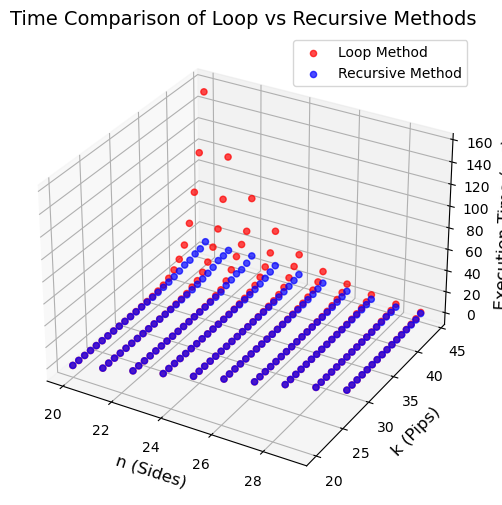

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 6)) #figure
ax = fig.add_subplot(111, projection='3d') #3d subplot

#scatterplot for loop method (red) values
ax.scatter(df['n'], df['k'], df['findAllLoopMethod Time (ms)'], color='r', label='Loop Method', alpha=0.7)

#scatterplot for recursive (blue) values
ax.scatter(df['n'], df['k'], df['recursive_dice_method Time (ms)'], color='b', label='Recursive Method', alpha=0.7)

#labeling
ax.set_xlabel('n (Sides)', fontsize=12)
ax.set_ylabel('k (Pips)', fontsize=12)
ax.set_zlabel('Execution Time (ms)', fontsize=12)
ax.set_title('Time Comparison of Loop vs Recursive Methods', fontsize=14)

ax.grid(True) #grid
ax.legend() #legend
plt.show() #print

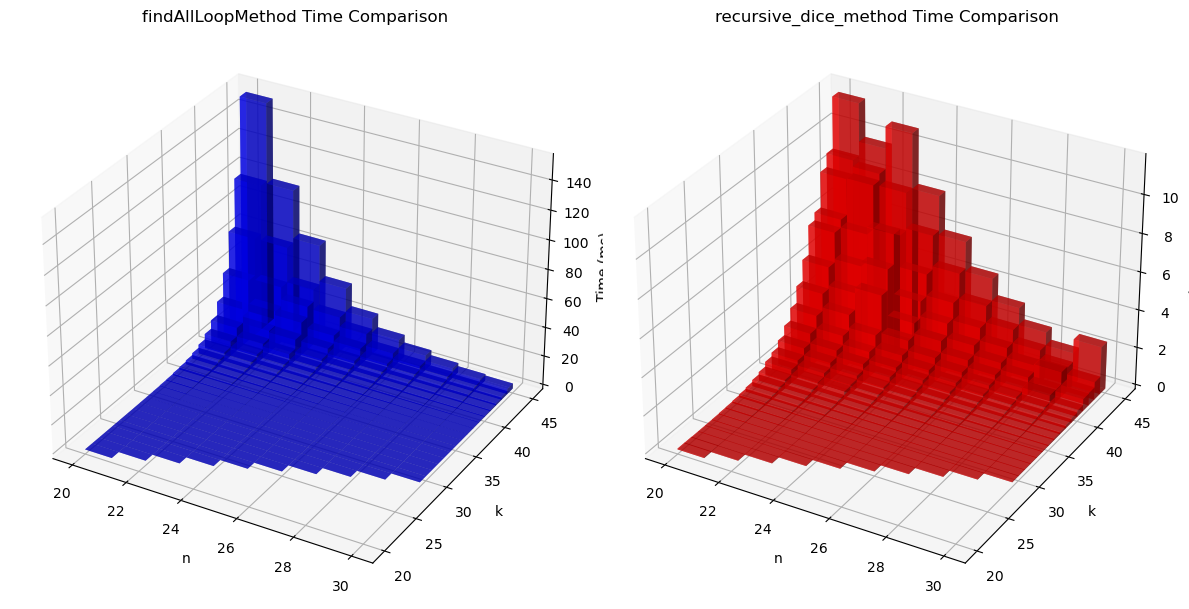

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Convert time_df to numpy arrays for plotting
n_values = time_df['n'].to_numpy()
k_values = time_df['k'].to_numpy()
find_all_times = time_df['findAllLoopMethod Time (ms)'].to_numpy()
recursive_times = time_df['recursive_dice_method Time (ms)'].to_numpy()

# Define the width, depth, and height of the bars
dx = np.ones_like(n_values)  # width of the bars
dy = np.ones_like(k_values)  # depth of the bars
dz_find_all = find_all_times  # heights for findAllLoopMethod
dz_recursive = recursive_times  # heights for recursive_dice_method

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# Subplot 1: for findAllLoopMethod
ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(n_values, k_values, np.zeros_like(n_values), dx, dy, dz_find_all, color='b', alpha=0.6)
ax1.set_xlabel('n')
ax1.set_ylabel('k')
ax1.set_zlabel('Time (ms)')
ax1.set_title('findAllLoopMethod Time Comparison')

# Subplot 2: for recursive_dice_method
ax2 = fig.add_subplot(122, projection='3d')
ax2.bar3d(n_values, k_values, np.zeros_like(n_values), dx, dy, dz_recursive, color='r', alpha=0.6)
ax2.set_xlabel('n')
ax2.set_ylabel('k')
ax2.set_zlabel('Time (ms)')
ax2.set_title('recursive_dice_method Time Comparison')

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()
